<a href="https://colab.research.google.com/github/Lelmats/API-FINAL/blob/main/Practica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión Logística:** red de una neurona

En este ejercicio se muestra una implementación de la regresión logística en forma de red neuronal. Este método de regresión permite clasificar datos con etiquetas binarias

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

Usemos como ejemplo la base de datos Iris. La cual esta disponible en scikit-learn

In [ ]:
iris = datasets.load_iris()

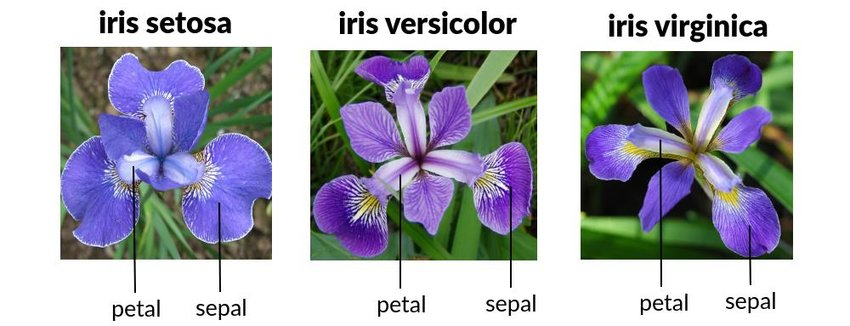

Tomamos los primeros dos valores del vector de rasgos de las primeras dos clases (la base de datos tienen tres clases).

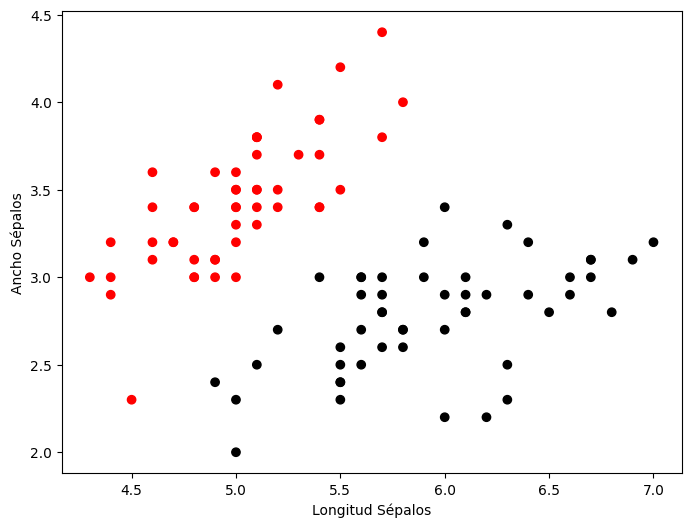

In [ ]:
idx  = iris.target<2        # primeras dos clases
y    = iris.target[idx]     # {0, 1}
x    = iris.data[idx, :2]   # primeras dos características

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0],
            x[:, 1],
            c=y,
            cmap=plt.cm.flag)

plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()

Podemos ver que los datos bidimensionale son linealmente separabes: esto es, existe un plano definido por un vector 𝑤, donde

\begin{align}
        w^T x_i \, \geq 0 \quad si \quad  y = 1 \\
        w^T x_i < 0 \quad si \quad  y = 0
\end{align}

Gráficamente, esto se muestra en la siguiente figura:

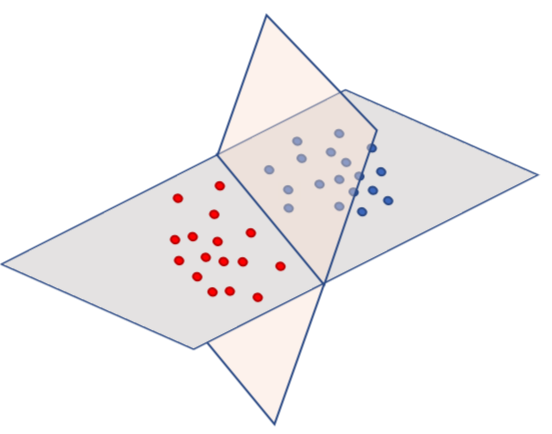

In [ ]:
import time
import keras
import numpy as np

from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

model.add(layers.Dense(units= 1,                       # numero de neuronas en la capa
                       activation  = 'sigmoid',        # funcion de activacion = sigmoide
                       name        = 'neurona_unica',  # nombre de la capa
                       input_shape = (2,)))            # tamaño de la entrada: (szIm, ) la otra


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 neurona_unica (Dense)       (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


La presente implementación de la regresión logística se puede resumir en la siguiente gráfica:

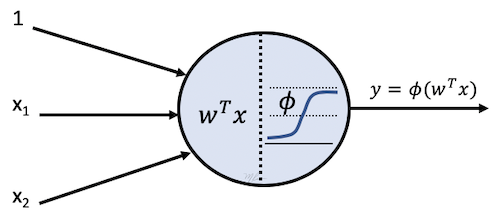


Si hemos elegido correctamente $w$ resultará que $\phi(w^T x_i) \approx y_i$ donde la sigmoide ajusta los valores de las etiquetas.

Entonces, encontrar el plano separador del conjunto de datos linealmente separable $𝑋$ consiste en resolver el problema de regresión:


\begin{gather*}
      \underset{w}{\mathrm{argmin}} \sum_{i} D[y_i, \hat{y}_i] \\
      \underset{w}{\mathrm{argmin}} \sum_{i} ||y_i - \hat{y}_i||_{2}^{2} + ||(1-y_i)-(1-\hat{y}_i)||_{2}^{2} \\
      \underset{w}{\mathrm{argmin}} \sum_{i} y_i\hat{y}_i + (1-y_i)-(1-\hat{y}_i)
\end{gather*}

Dado que $y$ está asociada con clasificar entre dos clases a la ecuación anterior se le conoce como correlación cruzada binaria (binary cross-entropy)

In [ ]:
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

In [ ]:
tic=time.time()

history = model.fit(x          = x,
                    y          = y,
                    epochs     = 1000,
                    shuffle    = True,
                    batch_size = 20,
                    verbose    = 0,
                    validation_split=0.2)

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Tiempo de procesamiento (secs):  49.524956941604614


In [ ]:
y_pred = model.predict(x).squeeze()
score  = model.evaluate(x, y, verbose=2)

print()
print('Test loss:\t',     score[0])
print('Test accuracy:\t', score[1])

4/4 [==============================] - 0s 3ms/step
4/4 - 0s - loss: 0.4734 - accuracy: 0.8700 - 189ms/epoch - 47ms/step

Test loss:	 0.47335731983184814
Test accuracy:	 0.8700000047683716


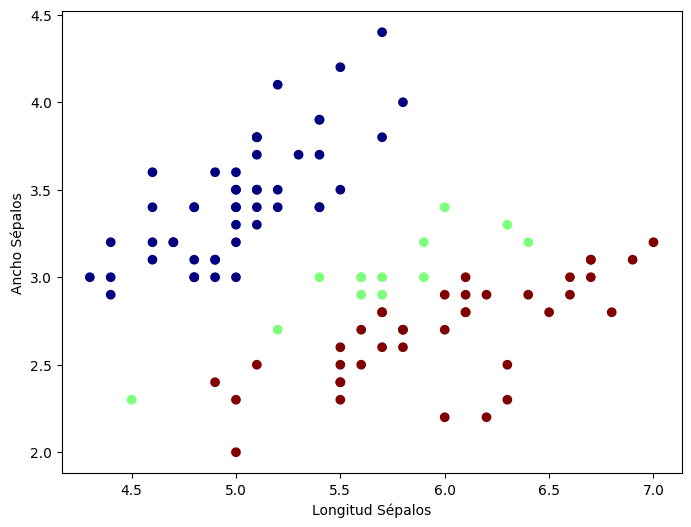

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0],
            x[:, 1],
            c=((y_pred>0.5)+y)/2.,
            cmap=plt.cm.jet)

plt.xlabel('Longitud Sépalos')
plt.ylabel('Ancho Sépalos')
plt.show()